### SCRAPING DATA

In [1]:
from google_play_scraper import app, reviews, Sort
import pandas as pd 
import datetime 
import csv

In [2]:
app_id = 'com.shopee.id'

def get_reviews(app_id, lang='id', count=5000, sort=Sort.NEWEST, filter_score_with=None, filter_device_with=None, continuation_token=None):
    try:
        result, continuation_token = reviews(
            app_id,
            lang=lang,
            country='id',
            sort=sort,
            count=count,
            filter_score_with=filter_score_with,
            filter_device_with=filter_device_with,  
            continuation_token=continuation_token
        )
        
        return result, continuation_token
    except Exception as e:
        print(f'Error: {e}')
        return None, None

reviews, continuation_token = get_reviews(app_id)

if reviews is not None:
    print(f'jumlah ulasan: {len(reviews)}')
    if len(reviews) > 0:
        print('Contoh ulasan:')
        print(reviews[0])
else:
    print('tidak dapat mengambil ulasan')
    

jumlah ulasan: 5000
Contoh ulasan:
{'reviewId': '8daa1097-9a9b-4315-9968-f87bcddfca78', 'userName': 'Pengguna Google', 'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g', 'content': 'praktis', 'score': 5, 'thumbsUpCount': 0, 'reviewCreatedVersion': '3.51.33', 'at': datetime.datetime(2025, 7, 10, 23, 20, 14), 'replyContent': 'hi kak Ellen Devora , makasih banget untuk bintang 5 nya. Semoga Shopee selalu bikin kamu puas dengan layanan dan produknya. Jangan lupa untuk ceki-ceki promo menarik dari Shopee terus yaa kak. Kalau ada kendala/pertanyaan terkait Shopee kakak bisa DM IG @Shopee_ID / @shopeecare_id ya. Happy shopping ^LI', 'repliedAt': datetime.datetime(2025, 7, 11, 0, 18, 59), 'appVersion': '3.51.33'}


In [3]:
def export_to_csv(reviews, file_name='hasil_scraping_aplikasi_Shopee.csv'):
    if reviews:
        fieldnames = ['Review ID', 'Username', 'Rating', 'Review Text', 'Date']
        
        with open(file_name, mode='w', newline='', encoding='utf-8') as csv_file:
            writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
            writer.writeheader()
            
            for review in reviews:
                writer.writerow({
                    'Review ID': review['reviewId'],
                    'Username': review['userName'],
                    'Rating': review['score'],
                    'Review Text': review['content'],
                    'Date': review['at']
                })
                
            print(f'Data berhasil diekspor ke {file_name}')
    else:
        print('Tidak ada data untuk diekspor')
        
export_to_csv(reviews)

Data berhasil diekspor ke hasil_scraping_aplikasi_Shopee.csv


In [4]:
data = pd.read_csv('hasil_scraping_aplikasi_Shopee.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    5000 non-null   object
 1   Username     5000 non-null   object
 2   Rating       5000 non-null   int64 
 3   Review Text  5000 non-null   object
 4   Date         5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB


In [5]:
data.head(10)

,Review ID,Username,Rating,Review Text,Date
0,8daa1097-9a9b-4315-9968-f87bcddfca78,Pengguna Google,5,praktis,2025-07-10 23:20:14
1,b0239e07-3f66-4569-a216-d7e422859570,Pengguna Google,5,sangat puas pelayanannya kurirnya pun ramah,2025-07-10 23:19:19
2,954813be-eff3-4059-847a-f701c0a3d5d2,Pengguna Google,1,kurir spx payah ..,2025-07-10 23:19:12
3,4a2774fd-517a-4c12-a558-190f6aebcaf5,Pengguna Google,5,bagus murah murah,2025-07-10 23:18:18
4,27e5d9f9-f765-462a-a302-3115d34a4d85,Pengguna Google,5,sangat bgus,2025-07-10 23:17:16
5,6312e3fe-a586-4e33-a807-a632148904df,Pengguna Google,5,cepat,2025-07-10 23:16:33
6,05882698-b648-451a-9a3a-602ec2db2b2e,Pengguna Google,5,bagus,2025-07-10 23:15:41
7,6e4afcc1-458a-4478-9926-24cbeb506ea5,Pengguna Google,5,bagus mudah prosesnya,2025-07-10 23:15:28
8,92df0c81-276a-4c54-bb33-bb89a5291cf6,Pengguna Google,5,good,2025-07-10 23:12:46
9,4f9a60f3-52a3-4d82-9dd3-0ba5b442bb3b,Pengguna Google,5,terpercaya,2025-07-10 23:12:27


### PREPOCESSING DATA

In [6]:
data = pd.read_csv('hasil_scraping_aplikasi_Shopee.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    5000 non-null   object
 1   Username     5000 non-null   object
 2   Rating       5000 non-null   int64 
 3   Review Text  5000 non-null   object
 4   Date         5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB


In [7]:
data.head()

,Review ID,Username,Rating,Review Text,Date
0,8daa1097-9a9b-4315-9968-f87bcddfca78,Pengguna Google,5,praktis,2025-07-10 23:20:14
1,b0239e07-3f66-4569-a216-d7e422859570,Pengguna Google,5,sangat puas pelayanannya kurirnya pun ramah,2025-07-10 23:19:19
2,954813be-eff3-4059-847a-f701c0a3d5d2,Pengguna Google,1,kurir spx payah ..,2025-07-10 23:19:12
3,4a2774fd-517a-4c12-a558-190f6aebcaf5,Pengguna Google,5,bagus murah murah,2025-07-10 23:18:18
4,27e5d9f9-f765-462a-a302-3115d34a4d85,Pengguna Google,5,sangat bgus,2025-07-10 23:17:16


In [8]:
df = pd.DataFrame(data[['Date','Username', 'Rating', 'Review Text']])
df.head(5)

,Date,Username,Rating,Review Text
0,2025-07-10 23:20:14,Pengguna Google,5,praktis
1,2025-07-10 23:19:19,Pengguna Google,5,sangat puas pelayanannya kurirnya pun ramah
2,2025-07-10 23:19:12,Pengguna Google,1,kurir spx payah ..
3,2025-07-10 23:18:18,Pengguna Google,5,bagus murah murah
4,2025-07-10 23:17:16,Pengguna Google,5,sangat bgus


''' DELETE DUPLICATE DATA '''

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         5000 non-null   object
 1   Username     5000 non-null   object
 2   Rating       5000 non-null   int64 
 3   Review Text  5000 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB


In [10]:
df.drop_duplicates(subset=['Review Text'], keep='first', inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3852 entries, 0 to 4997
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         3852 non-null   object
 1   Username     3852 non-null   object
 2   Rating       3852 non-null   int64 
 3   Review Text  3852 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.5+ KB


''' WORDCLOUD BEFORE PREPROCESSING '''

In [12]:
import pandas as pd
import numpy as np 
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [13]:
custom_stopwords = {
    'nya', 'sih', 'lah', 'dong', 'kok', 'aja', 'tapi', 'lagi', 'shopee', 'barang',
    'produk', 'pesanan', 'belanja', 'pengiriman', 'kurir', 'jasa', 'aplikasi', 'fitur',
    'harga', 'saya', 'aku', 'selalu', 'banyak', 'lebih', 'sekarang', 'sudah', 'sekali', 'sangat', 
    'promo', 'diskon', 'murah', 'termurah', 'grosir', 'sale', 'cashback', 'terlaris', 
    'bestseller', 'cod', 'gratis', 'ongkir', 'jual', 'dijual', 'premium', 'original', 
    'ori', 'asli', 'berkualitas', 'terbaik', 'kualitas', 'ready', 'stok', 'order', 
    'checkout', 'packing', 'garansi', 'kak', 'sis', 'gan', 'yg', 'dgn', 'utk', 'dan', 
    'di', 'ke', 'dari', 'untuk', 'ini', 'itu', 'ada', 'adalah', 'dengan', 'yang', 'saya'
}


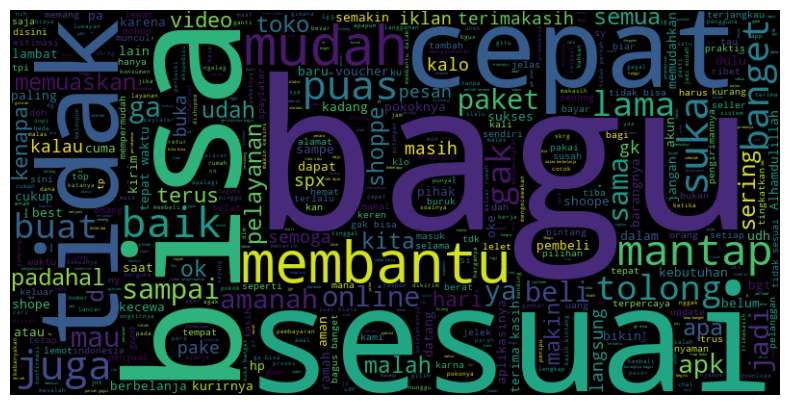

In [14]:
# isi nilai Nan dengan string kosong
df['Review Text'] = df['Review Text'].fillna('')

# gabungkan teks dari kolom 'content'
text = ' '.join(df['Review Text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(custom_stopwords)

wc = WordCloud(stopwords=stopwords, background_color='black', width=800, height=400, max_words=500)
wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

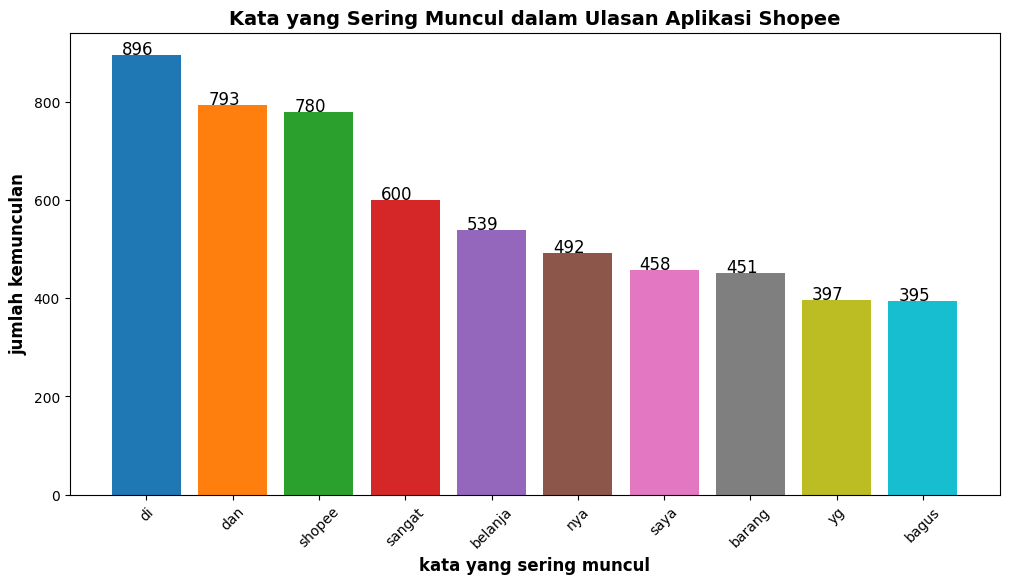

In [15]:
import matplotlib.pyplot as plt
from collections import Counter

text = ' '.join(df['Review Text'])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, counts = zip(*top_words)

# palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, counts, color=colors)
plt.xlabel("kata yang sering muncul", fontsize=12, fontweight='bold')
plt.ylabel("jumlah kemunculan", fontsize=12, fontweight='bold')
plt.title("Kata yang Sering Muncul dalam Ulasan Aplikasi Shopee", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

# menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')


plt.show()

''' CLEANING DATA '''

In [16]:
import re
import string
import emoji

def remove_url(tweet):
    if tweet is not None and isinstance(tweet, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', tweet)
    else:  
        return tweet

def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', tweet)
    else:
        return tweet

def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        return emoji.replace_emoji(tweet, replace='')
    return tweet

def remove_symbol(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
    return tweet

def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d+', '', tweet)
    return tweet

df['cleaning'] = df['Review Text'].apply(remove_url)
df['cleaning'] = df['cleaning'].apply(remove_html)
df['cleaning'] = df['cleaning'].apply(remove_emoji)
df['cleaning'] = df['cleaning'].apply(remove_symbol)
df['cleaning'] = df['cleaning'].apply(remove_numbers)

df.head(10)

,Date,Username,Rating,Review Text,cleaning
0,2025-07-10 23:20:14,Pengguna Google,5,praktis,praktis
1,2025-07-10 23:19:19,Pengguna Google,5,sangat puas pelayanannya kurirnya pun ramah,sangat puas pelayanannya kurirnya pun ramah
2,2025-07-10 23:19:12,Pengguna Google,1,kurir spx payah ..,kurir spx payah
3,2025-07-10 23:18:18,Pengguna Google,5,bagus murah murah,bagus murah murah
4,2025-07-10 23:17:16,Pengguna Google,5,sangat bgus,sangat bgus
5,2025-07-10 23:16:33,Pengguna Google,5,cepat,cepat
6,2025-07-10 23:15:41,Pengguna Google,5,bagus,bagus
7,2025-07-10 23:15:28,Pengguna Google,5,bagus mudah prosesnya,bagus mudah prosesnya
8,2025-07-10 23:12:46,Pengguna Google,5,good,good
9,2025-07-10 23:12:27,Pengguna Google,5,terpercaya,terpercaya


''' CASE FOLDING '''

In [17]:
def case_folding(tweet):
    if isinstance(tweet, str):
        lowercase_text = tweet.lower()
        return lowercase_text
    else:
        return text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(10)

,Date,Username,Rating,Review Text,cleaning,case_folding
0,2025-07-10 23:20:14,Pengguna Google,5,praktis,praktis,praktis
1,2025-07-10 23:19:19,Pengguna Google,5,sangat puas pelayanannya kurirnya pun ramah,sangat puas pelayanannya kurirnya pun ramah,sangat puas pelayanannya kurirnya pun ramah
2,2025-07-10 23:19:12,Pengguna Google,1,kurir spx payah ..,kurir spx payah,kurir spx payah
3,2025-07-10 23:18:18,Pengguna Google,5,bagus murah murah,bagus murah murah,bagus murah murah
4,2025-07-10 23:17:16,Pengguna Google,5,sangat bgus,sangat bgus,sangat bgus
5,2025-07-10 23:16:33,Pengguna Google,5,cepat,cepat,cepat
6,2025-07-10 23:15:41,Pengguna Google,5,bagus,bagus,bagus
7,2025-07-10 23:15:28,Pengguna Google,5,bagus mudah prosesnya,bagus mudah prosesnya,bagus mudah prosesnya
8,2025-07-10 23:12:46,Pengguna Google,5,good,good,good
9,2025-07-10 23:12:27,Pengguna Google,5,terpercaya,terpercaya,terpercaya


''' WORD NORMALIZATION '''

In [18]:
# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    kalimat_baku = []
    kata_diganti = []
    kata_tidak_baku_hash = []

    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        
        for word in words:
            baku_word = kamus_tidak_baku.get(word, word)
            replaced_words.append(baku_word)
            
            if baku_word != word:
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(baku_word)
                    kata_tidak_baku_hash.append(word)

        replaced_text = ' '.join(replaced_words)
    
    else:
        replaced_text = '' 

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [19]:
# Baca dataset
data = pd.DataFrame(df[['Date','Username', 'Rating', 'Review Text', 'cleaning', 'case_folding']])
data.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding
0,2025-07-10 23:20:14,Pengguna Google,5,praktis,praktis,praktis
1,2025-07-10 23:19:19,Pengguna Google,5,sangat puas pelayanannya kurirnya pun ramah,sangat puas pelayanannya kurirnya pun ramah,sangat puas pelayanannya kurirnya pun ramah
2,2025-07-10 23:19:12,Pengguna Google,1,kurir spx payah ..,kurir spx payah,kurir spx payah
3,2025-07-10 23:18:18,Pengguna Google,5,bagus murah murah,bagus murah murah,bagus murah murah
4,2025-07-10 23:17:16,Pengguna Google,5,sangat bgus,sangat bgus,sangat bgus


In [20]:
# baca kamus kata tidak baku
kamus_data = pd.read_excel('kamuskatabaku.xlsx')
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [21]:
# penerapan fungsi penggantian kata tidak baku
data['normalisasi'], data['Kata_baku'], data['Kata_tidak_baku'], data['Kata_tidak_baku_hash'] = zip(*data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))

df = pd.DataFrame(data[['Date', 'Username', 'Rating', 'Review Text', 'cleaning', 'case_folding', 'normalisasi']])
df.head(10)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi
0,2025-07-10 23:20:14,Pengguna Google,5,praktis,praktis,praktis,praktis
1,2025-07-10 23:19:19,Pengguna Google,5,sangat puas pelayanannya kurirnya pun ramah,sangat puas pelayanannya kurirnya pun ramah,sangat puas pelayanannya kurirnya pun ramah,sangat puas pelayanannya kurirnya pun ramah
2,2025-07-10 23:19:12,Pengguna Google,1,kurir spx payah ..,kurir spx payah,kurir spx payah,kurir spx payah
3,2025-07-10 23:18:18,Pengguna Google,5,bagus murah murah,bagus murah murah,bagus murah murah,bagus murah murah
4,2025-07-10 23:17:16,Pengguna Google,5,sangat bgus,sangat bgus,sangat bgus,sangat bagus
5,2025-07-10 23:16:33,Pengguna Google,5,cepat,cepat,cepat,cepat
6,2025-07-10 23:15:41,Pengguna Google,5,bagus,bagus,bagus,bagus
7,2025-07-10 23:15:28,Pengguna Google,5,bagus mudah prosesnya,bagus mudah prosesnya,bagus mudah prosesnya,bagus mudah prosesnya
8,2025-07-10 23:12:46,Pengguna Google,5,good,good,good,good
9,2025-07-10 23:12:27,Pengguna Google,5,terpercaya,terpercaya,terpercaya,terpercaya


''' TOKENIZATION '''

In [22]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenized'] = df['normalisasi'].apply(tokenize)

df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenized
0,2025-07-10 23:20:14,Pengguna Google,5,praktis,praktis,praktis,praktis,[praktis]
1,2025-07-10 23:19:19,Pengguna Google,5,sangat puas pelayanannya kurirnya pun ramah,sangat puas pelayanannya kurirnya pun ramah,sangat puas pelayanannya kurirnya pun ramah,sangat puas pelayanannya kurirnya pun ramah,"[sangat, puas, pelayanannya, kurirnya, pun, ra..."
2,2025-07-10 23:19:12,Pengguna Google,1,kurir spx payah ..,kurir spx payah,kurir spx payah,kurir spx payah,"[kurir, spx, payah]"
3,2025-07-10 23:18:18,Pengguna Google,5,bagus murah murah,bagus murah murah,bagus murah murah,bagus murah murah,"[bagus, murah, murah]"
4,2025-07-10 23:17:16,Pengguna Google,5,sangat bgus,sangat bgus,sangat bgus,sangat bagus,"[sangat, bagus]"


''' STOPWORD REMOVAL '''

In [23]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['stopwords removal'] = df['tokenized'].apply(lambda x: remove_stopwords(x))

df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenized,stopwords removal
0,2025-07-10 23:20:14,Pengguna Google,5,praktis,praktis,praktis,praktis,[praktis],[praktis]
1,2025-07-10 23:19:19,Pengguna Google,5,sangat puas pelayanannya kurirnya pun ramah,sangat puas pelayanannya kurirnya pun ramah,sangat puas pelayanannya kurirnya pun ramah,sangat puas pelayanannya kurirnya pun ramah,"[sangat, puas, pelayanannya, kurirnya, pun, ra...","[puas, pelayanannya, kurirnya, ramah]"
2,2025-07-10 23:19:12,Pengguna Google,1,kurir spx payah ..,kurir spx payah,kurir spx payah,kurir spx payah,"[kurir, spx, payah]","[kurir, spx, payah]"
3,2025-07-10 23:18:18,Pengguna Google,5,bagus murah murah,bagus murah murah,bagus murah murah,bagus murah murah,"[bagus, murah, murah]","[bagus, murah, murah]"
4,2025-07-10 23:17:16,Pengguna Google,5,sangat bgus,sangat bgus,sangat bgus,sangat bagus,"[sangat, bagus]",[bagus]


''' STEAMING DATA '''

In [25]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [26]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['steming_data'] = df['stopwords removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenized,stopwords removal,steming_data
0,2025-07-10 23:20:14,Pengguna Google,5,praktis,praktis,praktis,praktis,[praktis],[praktis],praktis
1,2025-07-10 23:19:19,Pengguna Google,5,sangat puas pelayanannya kurirnya pun ramah,sangat puas pelayanannya kurirnya pun ramah,sangat puas pelayanannya kurirnya pun ramah,sangat puas pelayanannya kurirnya pun ramah,"[sangat, puas, pelayanannya, kurirnya, pun, ra...","[puas, pelayanannya, kurirnya, ramah]",puas layan kurir ramah
2,2025-07-10 23:19:12,Pengguna Google,1,kurir spx payah ..,kurir spx payah,kurir spx payah,kurir spx payah,"[kurir, spx, payah]","[kurir, spx, payah]",kurir spx payah
3,2025-07-10 23:18:18,Pengguna Google,5,bagus murah murah,bagus murah murah,bagus murah murah,bagus murah murah,"[bagus, murah, murah]","[bagus, murah, murah]",bagus murah murah
4,2025-07-10 23:17:16,Pengguna Google,5,sangat bgus,sangat bgus,sangat bgus,sangat bagus,"[sangat, bagus]",[bagus],bagus


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3852 entries, 0 to 4997
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               3852 non-null   object
 1   Username           3852 non-null   object
 2   Rating             3852 non-null   int64 
 3   Review Text        3852 non-null   object
 4   cleaning           3852 non-null   object
 5   case_folding       3852 non-null   object
 6   normalisasi        3852 non-null   object
 7   tokenized          3852 non-null   object
 8   stopwords removal  3852 non-null   object
 9   steming_data       3852 non-null   object
dtypes: int64(1), object(9)
memory usage: 331.0+ KB


In [28]:
df.to_csv('hasil_preprocessing_data_ulasan_aplikasi_Shopee.csv', index=False)

''' WORDCLOUD AFTER PREPOCESSING '''

In [29]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

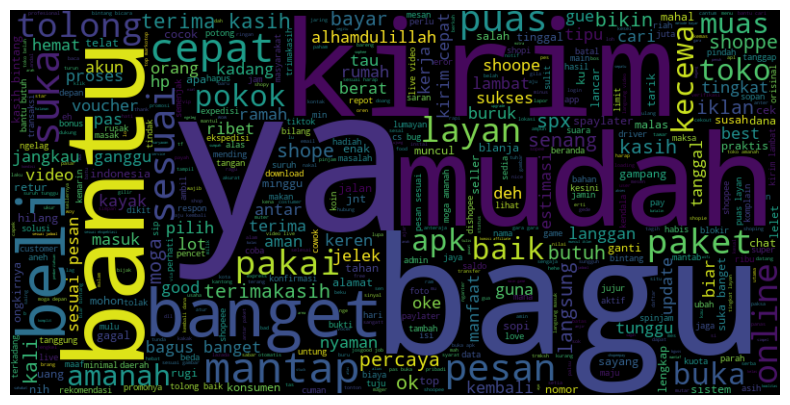

In [30]:
text = ' '.join(df['steming_data'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(custom_stopwords)

wc = WordCloud(stopwords=stopwords, background_color='black', width=800, height=400, max_words=500)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

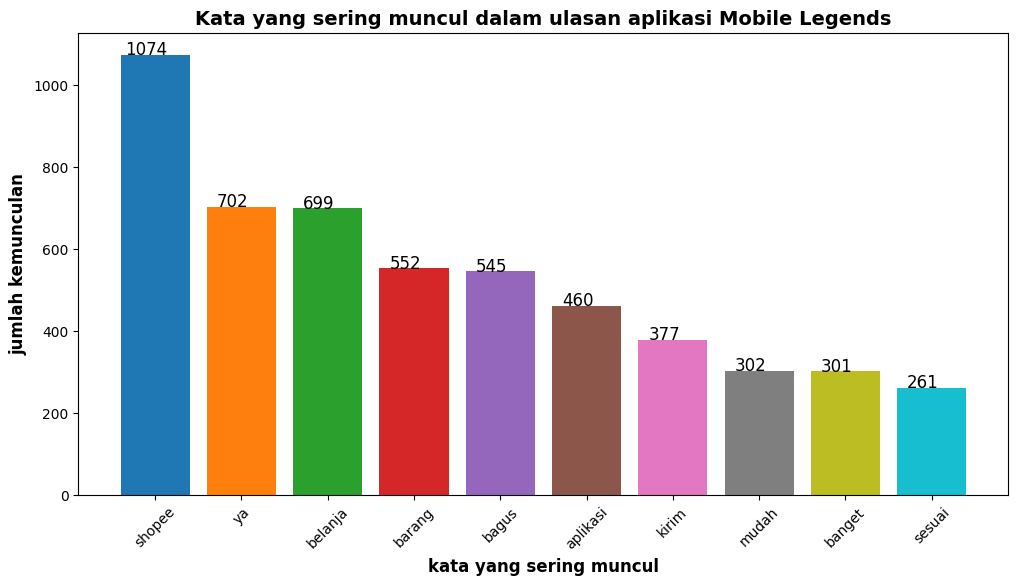

In [31]:
import matplotlib.pyplot as plt
from collections import Counter

text = ' '.join(df['steming_data'])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, counts = zip(*top_words)

stopwords = set(STOPWORDS)
stopwords.update(custom_stopwords)

# palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, counts, color=colors)
plt.xlabel("kata yang sering muncul", fontsize=12, fontweight='bold')
plt.ylabel("jumlah kemunculan", fontsize=12, fontweight='bold')
plt.title("Kata yang sering muncul dalam ulasan aplikasi Mobile Legends", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

# menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')


plt.show()

### LABELLING DATA LEXICON BASED

In [32]:
import pandas as pd

In [33]:
data = pd.read_csv('hasil_preprocessing_data_ulasan_aplikasi_Shopee.csv')
data.head()

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenized,stopwords removal,steming_data
0,2025-07-10 23:20:14,Pengguna Google,5,praktis,praktis,praktis,praktis,['praktis'],['praktis'],praktis
1,2025-07-10 23:19:19,Pengguna Google,5,sangat puas pelayanannya kurirnya pun ramah,sangat puas pelayanannya kurirnya pun ramah,sangat puas pelayanannya kurirnya pun ramah,sangat puas pelayanannya kurirnya pun ramah,"['sangat', 'puas', 'pelayanannya', 'kurirnya',...","['puas', 'pelayanannya', 'kurirnya', 'ramah']",puas layan kurir ramah
2,2025-07-10 23:19:12,Pengguna Google,1,kurir spx payah ..,kurir spx payah,kurir spx payah,kurir spx payah,"['kurir', 'spx', 'payah']","['kurir', 'spx', 'payah']",kurir spx payah
3,2025-07-10 23:18:18,Pengguna Google,5,bagus murah murah,bagus murah murah,bagus murah murah,bagus murah murah,"['bagus', 'murah', 'murah']","['bagus', 'murah', 'murah']",bagus murah murah
4,2025-07-10 23:17:16,Pengguna Google,5,sangat bgus,sangat bgus,sangat bgus,sangat bagus,"['sangat', 'bagus']",['bagus'],bagus


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3852 entries, 0 to 3851
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               3852 non-null   object
 1   Username           3852 non-null   object
 2   Rating             3852 non-null   int64 
 3   Review Text        3852 non-null   object
 4   cleaning           3831 non-null   object
 5   case_folding       3831 non-null   object
 6   normalisasi        3822 non-null   object
 7   tokenized          3852 non-null   object
 8   stopwords removal  3852 non-null   object
 9   steming_data       3797 non-null   object
dtypes: int64(1), object(9)
memory usage: 301.1+ KB


In [35]:
df = data.dropna()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3797 entries, 0 to 3851
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               3797 non-null   object
 1   Username           3797 non-null   object
 2   Rating             3797 non-null   int64 
 3   Review Text        3797 non-null   object
 4   cleaning           3797 non-null   object
 5   case_folding       3797 non-null   object
 6   normalisasi        3797 non-null   object
 7   tokenized          3797 non-null   object
 8   stopwords removal  3797 non-null   object
 9   steming_data       3797 non-null   object
dtypes: int64(1), object(9)
memory usage: 326.3+ KB


In [37]:
# fungsi menentukan sentimen
def determine_sentiment(text):
    positive_count = sum(1 for word in text.split() if word in positive_lexicon)
    negative_count = sum(1 for word in text.split() if word in negative_lexicon)
    if positive_count > negative_count:
        return 'positif'
    elif negative_count > positive_count:
        return 'negatif'
    
# Basa lexicon positif dan negatif
positive_lexicon = set(pd.read_csv("positive.tsv", sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv("negative.tsv", sep="\t", header=None)[0])

def replace_non_sentiment(sentiments):
    replace_flag = 'Positif'
    for i in range(len(sentiments)):
        if sentiments[i] is None:
            sentiments[i] = replace_flag
            replace_flag = 'Negatif' if replace_flag == 'Positif' else 'Positif'
    return sentiments

df['Sentiment'] = df['steming_data'].apply(determine_sentiment)
df['Sentiment'] = replace_non_sentiment(df['Sentiment'].tolist())

df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24096\3188799048.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['steming_data'].apply(determine_sentiment)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_24096\3188799048.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = replace_non_sentiment(df['Sentiment'].tolist())


,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenized,stopwords removal,steming_data,Sentiment
0,2025-07-10 23:20:14,Pengguna Google,5,praktis,praktis,praktis,praktis,['praktis'],['praktis'],praktis,positif
1,2025-07-10 23:19:19,Pengguna Google,5,sangat puas pelayanannya kurirnya pun ramah,sangat puas pelayanannya kurirnya pun ramah,sangat puas pelayanannya kurirnya pun ramah,sangat puas pelayanannya kurirnya pun ramah,"['sangat', 'puas', 'pelayanannya', 'kurirnya',...","['puas', 'pelayanannya', 'kurirnya', 'ramah']",puas layan kurir ramah,positif
2,2025-07-10 23:19:12,Pengguna Google,1,kurir spx payah ..,kurir spx payah,kurir spx payah,kurir spx payah,"['kurir', 'spx', 'payah']","['kurir', 'spx', 'payah']",kurir spx payah,Positif
3,2025-07-10 23:18:18,Pengguna Google,5,bagus murah murah,bagus murah murah,bagus murah murah,bagus murah murah,"['bagus', 'murah', 'murah']","['bagus', 'murah', 'murah']",bagus murah murah,Negatif
4,2025-07-10 23:17:16,Pengguna Google,5,sangat bgus,sangat bgus,sangat bgus,sangat bagus,"['sangat', 'bagus']",['bagus'],bagus,Positif


''' GRAPHIC '''

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24096\537464619.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')


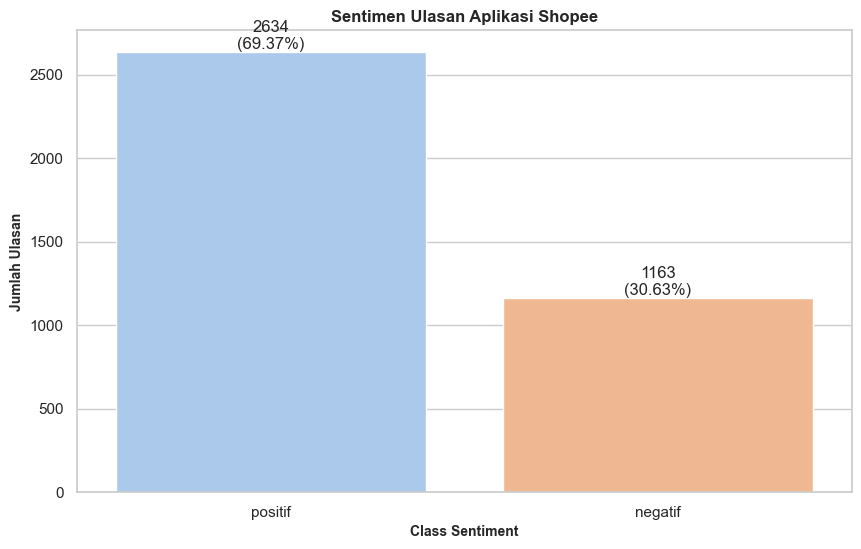

In [39]:
sentiment_counts = df['Sentiment'].str.lower().value_counts()
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')
plt.title('Sentimen Ulasan Aplikasi Shopee', fontsize=12, fontweight='bold')
plt.xlabel('Class Sentiment', fontsize=10, fontweight='bold')
plt.ylabel('Jumlah Ulasan', fontsize=10, fontweight='bold')

total = len(df['Sentiment'])

for i, count in enumerate(sentiment_counts):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')
    
plt.show()

In [40]:
df.to_csv('hasil_labelling_data_ulasan_aplikasi_Shopee.csv', encoding='utf8' ,index=False)

### MODEL ALGORITMA SUPPORT VECTOR MACHINE (SVM)

In [41]:
data = pd.read_csv('hasil_labelling_data_ulasan_aplikasi_Shopee.csv')
data.head()

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenized,stopwords removal,steming_data,Sentiment
0,2025-07-10 23:20:14,Pengguna Google,5,praktis,praktis,praktis,praktis,['praktis'],['praktis'],praktis,positif
1,2025-07-10 23:19:19,Pengguna Google,5,sangat puas pelayanannya kurirnya pun ramah,sangat puas pelayanannya kurirnya pun ramah,sangat puas pelayanannya kurirnya pun ramah,sangat puas pelayanannya kurirnya pun ramah,"['sangat', 'puas', 'pelayanannya', 'kurirnya',...","['puas', 'pelayanannya', 'kurirnya', 'ramah']",puas layan kurir ramah,positif
2,2025-07-10 23:19:12,Pengguna Google,1,kurir spx payah ..,kurir spx payah,kurir spx payah,kurir spx payah,"['kurir', 'spx', 'payah']","['kurir', 'spx', 'payah']",kurir spx payah,Positif
3,2025-07-10 23:18:18,Pengguna Google,5,bagus murah murah,bagus murah murah,bagus murah murah,bagus murah murah,"['bagus', 'murah', 'murah']","['bagus', 'murah', 'murah']",bagus murah murah,Negatif
4,2025-07-10 23:17:16,Pengguna Google,5,sangat bgus,sangat bgus,sangat bgus,sangat bagus,"['sangat', 'bagus']",['bagus'],bagus,Positif


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3797 entries, 0 to 3796
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               3797 non-null   object
 1   Username           3797 non-null   object
 2   Rating             3797 non-null   int64 
 3   Review Text        3797 non-null   object
 4   cleaning           3797 non-null   object
 5   case_folding       3797 non-null   object
 6   normalisasi        3797 non-null   object
 7   tokenized          3797 non-null   object
 8   stopwords removal  3797 non-null   object
 9   steming_data       3797 non-null   object
 10  Sentiment          3797 non-null   object
dtypes: int64(1), object(10)
memory usage: 326.4+ KB


In [43]:
df = data.dropna()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3797 entries, 0 to 3796
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               3797 non-null   object
 1   Username           3797 non-null   object
 2   Rating             3797 non-null   int64 
 3   Review Text        3797 non-null   object
 4   cleaning           3797 non-null   object
 5   case_folding       3797 non-null   object
 6   normalisasi        3797 non-null   object
 7   tokenized          3797 non-null   object
 8   stopwords removal  3797 non-null   object
 9   steming_data       3797 non-null   object
 10  Sentiment          3797 non-null   object
dtypes: int64(1), object(10)
memory usage: 326.4+ KB


''' TRAINING & TESTING '''

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
# bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(df['steming_data'], df['Sentiment'], test_size=0.2, random_state=42)

In [47]:
# simpan data train ke file
train_set = pd.DataFrame({'text' : X_train, 'sentiment': y_train})
train_set.to_csv('train_data.csv', index=False)

In [48]:
# simpan data test ke file
test_set = pd.DataFrame({'text' : X_test, 'sentiment': y_test})
test_set.to_csv('test_data.csv', index=False)

In [49]:
# info jumlah data train dan test
print(f'Jumlah data train: {len(train_set)}')
print(f'Jumlah data test: {len(test_set)}')

Jumlah data train: 3037
Jumlah data test: 760


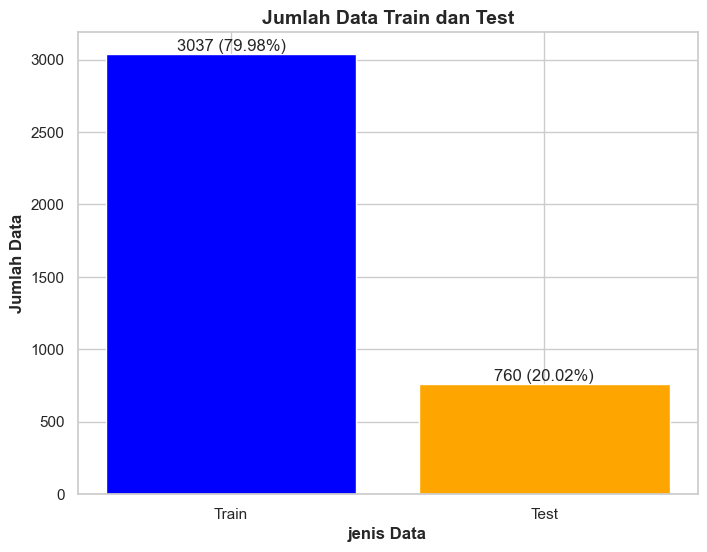

In [50]:
import matplotlib.pyplot as plt

#jumlah data train dan test
train_size = len(train_set)
test_size = len(test_set)

# buat plot
plt.figure(figsize=(8, 6))
bars = plt.bar(['Train', 'Test'], [train_size, test_size], color=['blue', 'orange'])

# menambahkan label setiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.7, f'{height} ({height / (train_size + test_size) * 100:.2f}%)', ha='center', va='bottom')
    
    
plt.title('Jumlah Data Train dan Test', fontsize=14, fontweight='bold')
plt.xlabel('jenis Data', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Data', fontsize=12, fontweight='bold')
plt.show()

''' SUPPORT VECTOR MACHINE (SVM) '''

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
# mendefinisikan vektorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [53]:
# menampilkan hasil vektorisasi untuk data train
print("Matriks Vektorisasi untuk Data Train:")
print(X_train_vectorized.toarray())

# menampilkan sebagian matriks 
print("\nSebagian Matriks Vektorisasi untuk Data Train:")
print(X_train_vectorized[:5, :].toarray()) 

Matriks Vektorisasi untuk Data Train:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Sebagian Matriks Vektorisasi untuk Data Train:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [54]:
# membuat dan melatih model SVM
svm = SVC(kernel='linear')
svm.fit(X_train_vectorized, y_train)

SVC(kernel='linear')

In [55]:
# evaluasi model
y_pred = svm.predict(X_test_vectorized)

In [56]:
# menampilkna confusion matrix dalam angka
cm_svm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix SVM:")
print(cm_svm)


Confusion Matrix SVM:
[[ 49  55   4   8]
 [ 61  34  14   9]
 [  7  14  89   9]
 [ 10   9   2 386]]


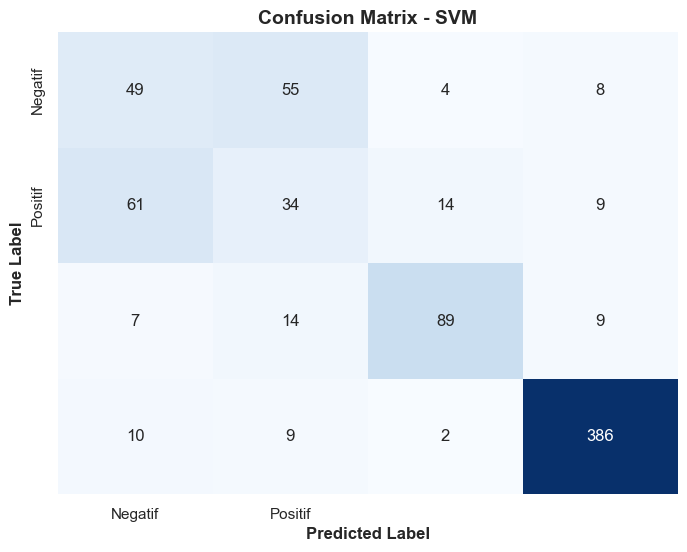

In [57]:
# fungsi untuk plot confusion matrix
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negatif', 'Positif'], 
                yticklabels=['Negatif', 'Positif'])
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
    plt.ylabel('True Label', fontsize=12, fontweight='bold')
    plt.show()

plot_confusion_matrix('SVM', y_test, y_pred)

In [58]:
# menampilkan akurasi untuk svm
accuracy_svm = accuracy_score(y_test, y_pred)
print("svm Accuracy:", accuracy_svm)
print(" ")

accuracy_svm_percentage = accuracy_svm * 100
print("SVM Accuracy Percentage: {:.2f}%".format(accuracy_svm_percentage))
print(" ")

# menampilkan classification report untuk svm
print("Classification Report SVM:")
print(classification_report(y_test, y_pred))

svm Accuracy: 0.7342105263157894
 
SVM Accuracy Percentage: 73.42%
 
Classification Report SVM:
              precision    recall  f1-score   support

     Negatif       0.39      0.42      0.40       116
     Positif       0.30      0.29      0.30       118
     negatif       0.82      0.75      0.78       119
     positif       0.94      0.95      0.94       407

    accuracy                           0.73       760
   macro avg       0.61      0.60      0.61       760
weighted avg       0.74      0.73      0.73       760



### WORDCLOUD AFTER SVM

In [59]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [60]:
data = pd.read_csv('hasil_labelling_data_ulasan_aplikasi_Shopee.csv')
data.head()

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenized,stopwords removal,steming_data,Sentiment
0,2025-07-10 23:20:14,Pengguna Google,5,praktis,praktis,praktis,praktis,['praktis'],['praktis'],praktis,positif
1,2025-07-10 23:19:19,Pengguna Google,5,sangat puas pelayanannya kurirnya pun ramah,sangat puas pelayanannya kurirnya pun ramah,sangat puas pelayanannya kurirnya pun ramah,sangat puas pelayanannya kurirnya pun ramah,"['sangat', 'puas', 'pelayanannya', 'kurirnya',...","['puas', 'pelayanannya', 'kurirnya', 'ramah']",puas layan kurir ramah,positif
2,2025-07-10 23:19:12,Pengguna Google,1,kurir spx payah ..,kurir spx payah,kurir spx payah,kurir spx payah,"['kurir', 'spx', 'payah']","['kurir', 'spx', 'payah']",kurir spx payah,Positif
3,2025-07-10 23:18:18,Pengguna Google,5,bagus murah murah,bagus murah murah,bagus murah murah,bagus murah murah,"['bagus', 'murah', 'murah']","['bagus', 'murah', 'murah']",bagus murah murah,Negatif
4,2025-07-10 23:17:16,Pengguna Google,5,sangat bgus,sangat bgus,sangat bgus,sangat bagus,"['sangat', 'bagus']",['bagus'],bagus,Positif


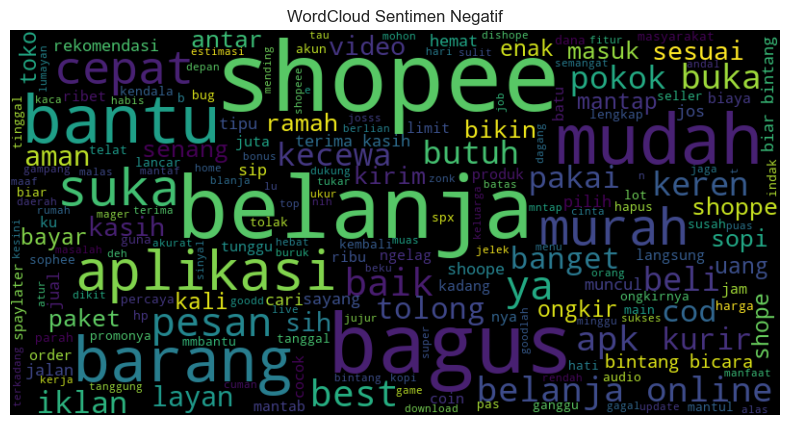

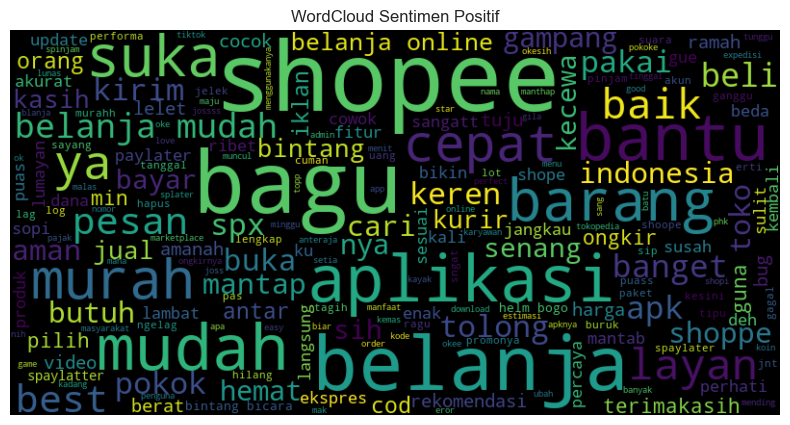

In [61]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pisahkan dataset berdasarkan sentimen
sentimen_negatif = data[data['Sentiment'] == 'Negatif']['steming_data'].str.cat(sep=' ')
sentimen_positif = data[data['Sentiment'] == 'Positif']['steming_data'].str.cat(sep=' ')

# Fungsi untuk membuat dan menampilkan WordCloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='black').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


# Membuat WordCloud untuk sentimen negatif
create_wordcloud(sentimen_negatif, 'WordCloud Sentimen Negatif')


# Membuat WordCloud untuk sentimen positif
create_wordcloud(sentimen_positif, 'WordCloud Sentimen Positif')

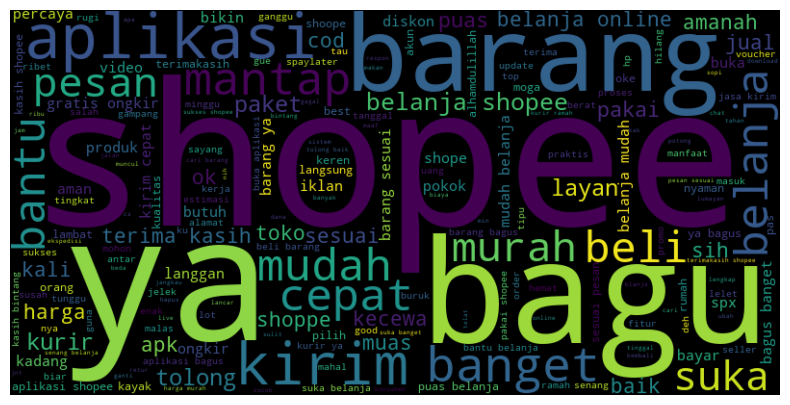

In [62]:
text = ' '.join(data['steming_data'].apply(lambda x: str(x) if isinstance(x, (str, int, float)) else ''))
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

### RATING 

In [63]:
import pandas as pd

In [64]:
data = pd.read_csv('hasil_labelling_data_ulasan_aplikasi_Shopee.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3797 entries, 0 to 3796
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               3797 non-null   object
 1   Username           3797 non-null   object
 2   Rating             3797 non-null   int64 
 3   Review Text        3797 non-null   object
 4   cleaning           3797 non-null   object
 5   case_folding       3797 non-null   object
 6   normalisasi        3797 non-null   object
 7   tokenized          3797 non-null   object
 8   stopwords removal  3797 non-null   object
 9   steming_data       3797 non-null   object
 10  Sentiment          3797 non-null   object
dtypes: int64(1), object(10)
memory usage: 326.4+ KB


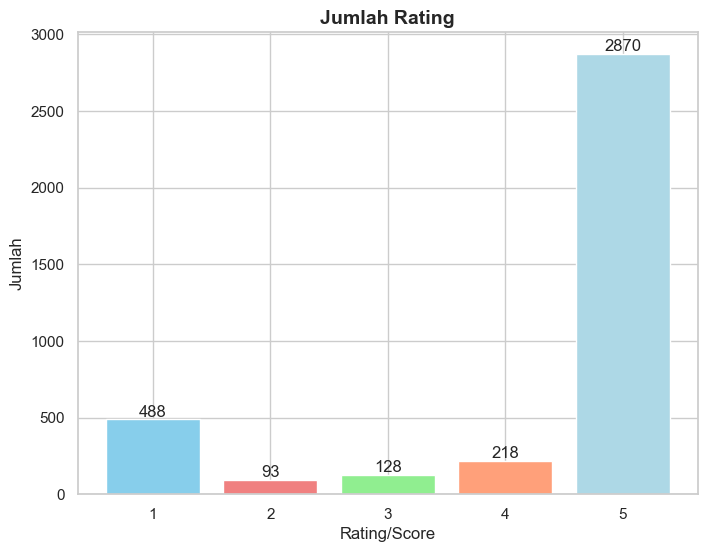

In [65]:
import matplotlib.pyplot as plt

rating_counts = data['Rating'].value_counts()
rating_counts = rating_counts.sort_index()

colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue']

plt.figure(figsize=(8, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors)
plt.title('Jumlah Rating', fontsize=14, fontweight='bold')
plt.xlabel('Rating/Score')
plt.ylabel('Jumlah')
plt.xticks(rating_counts.index)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.show()